# Dziban MKIII

In [1]:
from dziban import Chart
from vega_datasets import data

In [2]:
base = Chart(data.cars())

## Example 1

A user is analyzing the cars dataset. They begin by asking the question, 'How does horsepower relate to MPG?' They can formulate such a query as such.

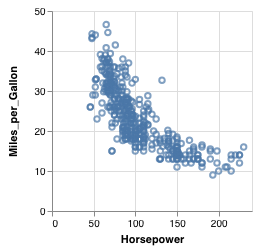

In [3]:
scatter = base.field('Horsepower', 'Miles_per_Gallon')
scatter

A simple scatterplot is recommended. This is the basis of recommendation with __Dziban__, but we can also build upon this result.

## Example 2

Now, taking a look at `scatter`, a trend is visible: increasing __horsepower__ is correlated with decreasing __MPG__. To confirm this, they may which to view an aggregate metric: the mean of the horsepower in relation to MPG.

A __cold__ recommendation would yield the following.




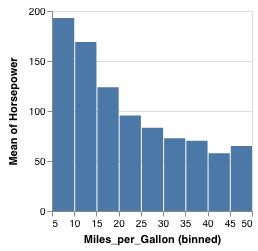

In [20]:
bad_binned = base.field('Miles_per_Gallon').field('Horsepower', aggregate='mean')
bad_binned

Note that a few things have changed that may be confusing. First, the x and y axes were swapped. The pattern seen in the previous visualization has been flipped. Second, the `zero` baseline for MPG has been removed, which again makes comparison difficult. A better visualization would be one that has been __anchored__, and thus changes the least number of items whilst optimizing effectiveness.



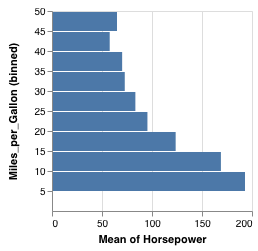

In [18]:
good_binned = bad_binned.anchor(scatter)
good_binned

## Example 2

Suppose now the user has begun with the bar chart we left off on in __example 1__, `good_binned`. They wish to see this relationship, but additionally as pertains to the country of __origin__. That is, they wish to see the relationship between mean horsepower, miles per gallon, and origin. A recommendation from scratch would be as such.

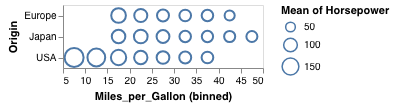

In [21]:
origin_bad = base.field('Miles_per_Gallon', 'Origin').field('Horsepower', aggregate='mean')
origin_bad

Again, however, reading this chart will require additional time, as many encodings have been moved around (MPG from y to x, horsepower from x to size, bar mark to point mark). To minimize the cognitive load made on users, we should preserve the encodings present in `good_binned` above (the user's reference point).

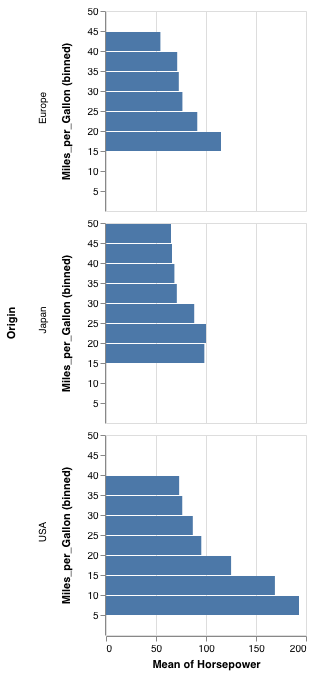

In [16]:
origin_good = good_binned.field('Origin').anchor(good_binned)
origin_good